# Linear Regression for House Moving

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# poetry add: numpy, pandas, juputerlab, mathplotlib, sklearn, seaborn

### Load info to pandas

In [3]:
# load the data
cities = pd.read_csv('./cities.csv')

### Show first 5 rows

In [5]:
cities.head(5)

,City,Country,Housing Affordability,Living Costs by Income,Unemployment,Education,Safety,Mobility,Air Quality,Healthcare,Kids Activities,Paid Parental Leave,Family Inclusivity,Neighbourhood Safety,Family-Friendliness,Total,Lat,Long
0,Helsinki,Finland,76.29,91.71,9.20,92.54,88.7,77.30,19.11,84.40,71.15,1190,100.0,89,95,100.00,60.167410,24.942577
1,Quebec,Canada,99.81,86.30,3.80,95.23,92.5,73.02,18.00,76.32,78.66,364,100.0,94,92,99.06,52.476089,-71.825867
2,Oslo,Norway,84.60,94.95,2.30,89.08,87.3,75.95,22.49,85.97,68.67,707,100.0,87,96,98.13,59.913330,10.738970
3,Munich,Germany,83.49,100.00,3.77,90.06,90.4,79.00,21.38,73.33,78.16,467,100.0,83,94,96.75,48.137108,11.575382
4,Copenhagen,Denmark,80.60,94.88,4.40,89.08,93.6,98.09,26.54,73.47,78.79,364,100.0,81,92,96.53,55.686724,12.570072


### Show the dataset description

In [6]:
cities.describe

<bound method NDFrame.describe of             City  Country  Housing Affordability  Living Costs by Income  \
0       Helsinki  Finland                  76.29                   91.71   
1         Quebec   Canada                  99.81                   86.30   
2           Oslo   Norway                  84.60                   94.95   
3         Munich  Germany                  83.49                  100.00   
4     Copenhagen  Denmark                  80.60                   94.88   
..           ...      ...                    ...                     ...   
145       Manama  Bahrain                  48.95                   70.29   
146       Ankara   Turkey                  65.29                   15.37   
147        Izmir   Turkey                  57.27                    5.54   
148  Kuwait City   Kuwait                   1.00                   64.96   
149     Istanbul   Turkey                  22.51                    1.00   

     Unemployment  Education  Safety  Mobility  Air Q

### Show dataset info 

In [ ]:
cities.info

### Create a subset of houses on US

In [9]:
us_cities = cities.loc[cities['Country'] == 'US']
us_cities

,City,Country,Housing Affordability,Living Costs by Income,Unemployment,Education,Safety,Mobility,Air Quality,Healthcare,Kids Activities,Paid Parental Leave,Family Inclusivity,Neighbourhood Safety,Family-Friendliness,Total,Lat,Long
23,San Francisco,US,81.83,90.55,2.68,85.53,83.3,79.96,15.77,65.44,98.39,117,100.0,85,79,86.38,37.764799,-122.462990
26,Boston,US,77.82,82.77,3.11,92.33,87.0,81.55,12.32,73.98,76.41,0,100.0,78,86,84.96,42.360253,-71.058291
27,San Diego,US,80.53,90.59,3.30,85.53,86.8,62.27,15.05,68.65,93.85,117,100.0,74,92,84.75,32.717421,-117.162771
29,Seattle,US,87.73,87.99,3.88,87.28,84.3,66.25,11.97,72.09,87.08,0,100.0,87,90,84.43,47.603832,-122.330062
41,Minneapolis,US,88.57,85.35,2.68,87.44,85.5,67.91,12.18,74.33,62.43,0,100.0,89,92,82.34,44.977300,-93.265469
42,Portland,US,87.44,84.96,3.79,86.20,87.3,64.84,10.44,68.70,75.02,0,100.0,88,93,82.24,45.520247,-122.674195
44,Omaha,US,93.56,90.50,2.87,86.94,84.4,63.13,15.47,64.11,64.85,0,100.0,92,89,81.93,41.258746,-95.938376
47,Austin,US,87.70,94.49,2.92,85.70,86.7,53.59,14.30,56.33,76.74,0,100.0,81,91,81.08,30.271129,-97.743700
48,Denver,US,88.58,89.76,3.01,86.86,83.8,61.67,11.02,67.83,66.90,0,100.0,92,84,80.96,39.734838,-104.965327
53,Tampa,US,90.30,91.25,3.40,86.03,84.9,61.31,12.37,63.64,70.80,0,84.6,84,81,79.69,27.947759,-82.458444


In [ ]:
Select corresponding features

In [17]:
X = us_cities['Living Costs by Income'].values
y = us_cities['Education'].values

# # Transform from 1D to 2D, with all rows as needed(-1)
X = X.reshape(-1,1)
# X
# City	Country	Housing Affordability	Living Costs by Income	Unemployment	Education	Safety	Mobility	Air Quality	Healthcare	Kids Activities	Paid Parental Leave	Family Inclusivity	Neighbourhood Safety	Family-Friendliness	Total	Lat	Long

### Create trains

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (38, 1)
y_train shape (38,)
X_test shap (10, 1)
y_test shape (10,)
[86.94 85.53 86.86 85.78 85.53 85.95 86.2  86.53 86.03 85.62]


### Create plot to show

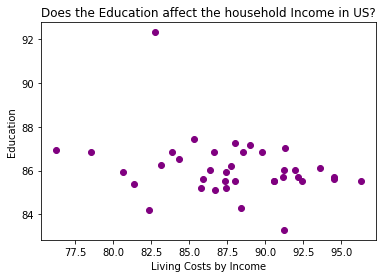

In [20]:
#  had to add the nexy line to maje it work
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(x_train,y_train,color='purple')
plt.xlabel('Living Costs by Income')
plt.ylabel('Education')
plt.title('Does the Education affect the household Income in US?')
plt.show()